In [2]:
using PyCall

using DrWatson
quickactivate(@__DIR__)

include(projectdir("scripts", "notebooks_netsense_funs.jl"))


form_triad_network (generic function with 1 method)

In [3]:
fname = datadir("exp_pro", "NetSense_network.pkl")
file = load_pickle(fname)

Dict{Any, Any} with 6 entries:
  5 => PyObject <networkx.classes.graph.Graph object at 0x7f9efa20f9d0>
  4 => PyObject <networkx.classes.graph.Graph object at 0x7f9efa253d90>
  6 => PyObject <networkx.classes.graph.Graph object at 0x7f9efa1d1cd0>
  2 => PyObject <networkx.classes.graph.Graph object at 0x7f9efa2d14f0>
  3 => PyObject <networkx.classes.graph.Graph object at 0x7f9efa21a130>
  1 => PyObject <networkx.classes.graph.Graph object at 0x7f9f1e8fd280>

In [4]:
#works! (shows a lot without semicolon)
file[1].nodes.data();
[n for n in file[1].neighbors(75178)]

3-element Vector{Int64}:
 26999
 30952
 62555

In [5]:
As = [get_adjacency_matrix(file[i]) for i in 1:6]
A1 = get_adjacency_matrix(file[1])
A2 = As[2]
A1

98×98 Matrix{Int64}:
  0  11    0    4   2   0   0   0   0  …  0  0  0   0   0  0   0  0  0  0  0
 11   0   61    8   0   0   0   0   0     0  0  0   0   0  0   0  0  0  0  0
  0  61    0  193  19   0   0   0   0     0  0  0   0   0  0   0  0  0  0  0
  4   8  193    0   5   0   0   0   8     0  0  0   0   0  0   0  0  0  0  0
  2   0   19    5   0   0   0   7   0     0  0  0   0   0  0   0  1  0  0  0
  0   0    0    0   0   0  18  36  49  …  0  0  0   0   0  0   0  0  0  0  0
  0   0    0    0   0  18   0   0   0     0  0  0   0   0  0   0  2  0  0  0
  0   0    0    0   7  36   0   0  81     0  0  0   0   0  0   0  0  0  0  0
  0   0    0    8   0  49   0  81   0     0  0  0   0   0  0   0  0  0  0  0
  0   0    0    0   0   0   0   0   0     0  0  0   0   0  0   0  0  0  0  0
  ⋮                     ⋮              ⋱            ⋮                ⋮     
  0   0    0    0   0   0   0   0   0     0  0  0   0   0  0   0  0  0  0  0
  0   0    0    0   0   0   0   0   0  …  0  0  0   0  8

In [6]:
get_adjacency_matrix(file[1], file[2].nodes())

89×89 Matrix{Int64}:
    0  2878    0    0    0    0    0  …  0  0  0  0  0  0  0  0   0  0    0
 2878     0   70    0    0    0    0     0  0  0  0  0  0  0  0   0  0    0
    0    70    0  127    0    0    0     0  0  0  0  0  0  0  0   0  0    0
    0     0  127    0    0    0    0     0  0  0  0  0  0  0  0   0  0    0
    0     0    0    0    0  315    0     0  0  0  0  0  0  0  0   0  0  124
    0     0    0    0  315    0    0  …  0  0  0  0  0  0  0  0   0  0    0
    0     0    0    0    0    0    0     0  0  0  0  0  0  0  0   0  0    0
    0     0    0    0    0    0  278     0  0  0  0  0  0  0  0   0  0    0
    0     0    0    0   20    0    0     0  0  0  0  0  0  0  0  18  0    0
    0     0    0    0    0    0    0     0  0  0  0  0  0  0  0   0  0    0
    ⋮                         ⋮       ⋱        ⋮              ⋮         
    0     0    0    0    0    0    0  …  0  0  0  0  0  0  0  0   0  0    0
    0     0    0    0    0    0    0     0  0  0  0  0  0  0  0   0  0

In [7]:
print(file[1].nodes())
[n for n in file[1].neighbors(75178)]

PyObject NodeView((75178, 30952, 13116, 62555, 26999, 10841, 17353, 86352, 53275, 77291, 18394, 36006, 57637, 71627, 75261, 19844, 25323, 40997, 52635, 45945, 72746, 15071, 46771, 29914, 52067, 37617, 30076, 71700, 19066, 51675, 63188, 79877, 14106, 76313, 82282, 85596, 10060, 75468, 46021, 23642, 50869, 68633, 18420, 68494, 39783, 21350, 66404, 85970, 59367, 13799, 62560, 16495, 34853, 67947, 50709, 70889, 86727, 45539, 14188, 89827, 11692, 82060, 66754, 66245, 46654, 32174, 58909, 25947, 34250, 18344, 38823, 22745, 26127, 38893, 31372, 68533, 31583, 49597, 73303, 46160, 25544, 51597, 49294, 51722, 66052, 53884, 51552, 80058, 10281, 45292, 32899, 26425, 78911, 23144, 44520, 50181, 88175, 63063))

3-element Vector{Int64}:
 26999
 30952
 62555

In [8]:
nodes = get_all_nodes(file)
Ws = create_series_adj_mat(file, nodes)
As = [sign.(W) for W in Ws]

all_triads = [get_triads2(As[i]) for i in 1:6];

In [9]:
map(length, all_triads)'

1×6 adjoint(::Vector{Int64}) with eltype Int64:
 45  26  9  26  20  12

In [10]:
# Let's check how many people are in triads

triad_nodes = sort(unique([node for triads in all_triads for triad in triads for node in triad]))
display(length(triad_nodes))

# There are only 60 nodes, so lets repeat above experiment with generating links only among these agents. 
# But first I need to count how many edges were added among those agents

As2 = [As[i][triad_nodes, triad_nodes] for i in 1:6]

60

6-element Vector{Matrix{Int64}}:
 [0 1 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

## Let's count attribute changes now

In [11]:
#creating list of attributes
list_of_attributes = Set([k for n in file[1].nodes for k in keys(file[1].nodes[n+1])])

# creating possible attribute values
attribute_values = Dict((attribute, Set() ) for attribute in list_of_attributes)

for sem in 1:6
    for node in file[sem].nodes()
        for attribute in list_of_attributes
            push!(attribute_values[attribute], convert(Int, file[sem].nodes[node + 1][attribute]))
        end
    end
end

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

Dict{String, Set{Any}} with 12 entries:
  "premaritalsex_" => Set([2, 3, 1])
  "ethnicity_1"    => Set([4, 2, 3, 1])
  "hometown_1"     => Set([2, 3, 1])
  "political_"     => Set([2, 3, 1])
  "abortion_"      => Set([2, 3, 1])
  "homosexual_"    => Set([2, 3, 1])
  "marijuana_"     => Set([2, 3, 1])
  "gender_1"       => Set([2, 1])
  "gaymarriage_"   => Set([2, 3, 1])
  "deathpen_"      => Set([2, 3, 1])
  "euthanasia_"    => Set([2, 3, 1])
  "age_1"          => Set([2, 1])

In [12]:
#creating table of attribute values
attributes = Dict((i, zeros(length(nodes), length(list_of_attributes))) for i in 1:6)
# for i in 1:6
#     attributes[i] = zeros(length(file[i].nodes), length(list_of_attributes))
# end

for sem in 1:6
    for (i, node) in enumerate(nodes)
        for (j, attribute) in enumerate(list_of_attributes)
            if node in file[sem].nodes()
                attributes[sem][i,j] = file[sem].nodes[node + 1][attribute]
            else
                attributes[sem][i,j] = NaN
            end
        end
    end
end
attributes

Dict{Int64, Matrix{Float64}} with 6 entries:
  5 => [3.0 3.0 … 2.0 1.0; 3.0 3.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; 1.0 3.0 … …
  4 => [3.0 3.0 … 2.0 1.0; 3.0 3.0 … 2.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 3.0 … …
  6 => [NaN NaN … NaN NaN; 3.0 3.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  2 => [NaN NaN … NaN NaN; 3.0 3.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  3 => [3.0 3.0 … 2.0 1.0; 3.0 1.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  1 => [3.0 3.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0; … ; NaN NaN … NaN NaN; NaN NaN … …

In [13]:

ord_list_of_attributes = setdiff(list_of_attributes, ["ethnicity_1", "gender_1", "hometown_1", "age_1"])
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = Dict((i, zeros(length(nodes), length(ord_list_of_attributes))) for i in 1:6)

for sem in 1:6
    for (i, node) in enumerate(nodes)
        for (j, attribute) in enumerate(ord_list_of_attributes)
            if node in file[sem].nodes()
                ord_attributes[sem][i,j] = file[sem].nodes[node + 1][attribute]
            else
                ord_attributes[sem][i,j] = NaN
            end
        end
    end
end
# for sem in range(1,7):
#     for i, node in enumerate(data[sem].nodes()):
#         for j, attribute in enumerate(ord_list_of_attributes):
#             ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
ord_attributes

Set(["abortion_", "premaritalsex_", "homosexual_", "marijuana_", "euthanasia_", "gaymarriage_", "deathpen_", "political_"])

Dict{Int64, Matrix{Float64}} with 6 entries:
  5 => [3.0 3.0 … 3.0 1.0; 3.0 3.0 … 3.0 2.0; … ; NaN NaN … NaN NaN; 1.0 3.0 … …
  4 => [3.0 3.0 … 3.0 1.0; 3.0 3.0 … 1.0 1.0; … ; 1.0 1.0 … 3.0 1.0; 1.0 3.0 … …
  6 => [NaN NaN … NaN NaN; 3.0 3.0 … 3.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  2 => [NaN NaN … NaN NaN; 3.0 3.0 … 1.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  3 => [3.0 3.0 … 3.0 1.0; 3.0 1.0 … 1.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  1 => [3.0 3.0 … 3.0 1.0; 2.0 2.0 … 2.0 1.0; … ; NaN NaN … NaN NaN; NaN NaN … …

## Let us calculate triad transitions including nans

In [14]:
ths = [0:0.01:1...]
bal_to_bals = []
ubal_to_bals = []
bal_to_bals2 = []
ubal_to_bals2 = []
bal_to_bals3 = []
ubal_to_bals3 = []
bal_to_ubals3 = []
ubal_to_ubals3 = []
bal_to_nots3 = []
ubal_to_nots3 = []

for th in ths
    res = get_triad_transitions(all_triads, th, ord_attributes; all_triads_list = [] )
    bal_to_bal = res[1][1,1] / sum(res[1][1,1:2])
    ubal_to_bal = res[1][2,1] / sum(res[1][2,1:2])
    bal_to_bal2 = res[3][1,1] / sum(res[3][1,1:2])
    ubal_to_bal2 = res[3][2,1] / sum(res[3][2,1:2])
    bal_to_bal3 = res[1][1,1] / sum(res[1][1,1:3])
    ubal_to_bal3 = res[1][2,1] / sum(res[1][2,1:3])
    bal_to_ubal3 = res[1][1,2] / sum(res[1][1,1:3])
    ubal_to_ubal3 = res[1][2,2] / sum(res[1][2,1:3])
    bal_to_not3 = res[1][1,3] / sum(res[1][1,1:3])
    ubal_to_not3 = res[1][2,3] / sum(res[1][2,1:3])
    
    push!(bal_to_bals, bal_to_bal)
    push!(ubal_to_bals, ubal_to_bal)
    push!(bal_to_bals2, bal_to_bal2)
    push!(ubal_to_bals2, ubal_to_bal2)
    push!(bal_to_bals3, bal_to_bal3)
    push!(ubal_to_bals3, ubal_to_bal3)
    push!(bal_to_ubals3, bal_to_ubal3)
    push!(ubal_to_ubals3, ubal_to_ubal3)
    push!(bal_to_nots3, bal_to_not3)
    push!(ubal_to_nots3, ubal_to_not3)
end

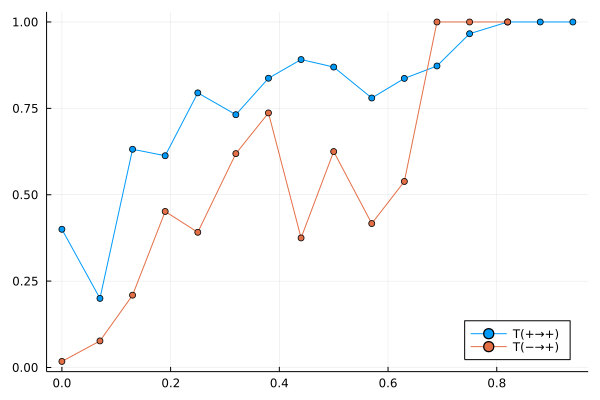

In [15]:
points = 16

chosen_ths = [0:points-1...] ./ points
inds = [findfirst(ths .>= chosen_ths[i]) for i in 1:length(chosen_ths)]

plot(ths[inds], bal_to_bals[inds], markershape = :circle, label = "T(+→+)", legend = :bottomright)
plot!(ths[inds], ubal_to_bals[inds], markershape = :circle, label = "T(−→+)") 

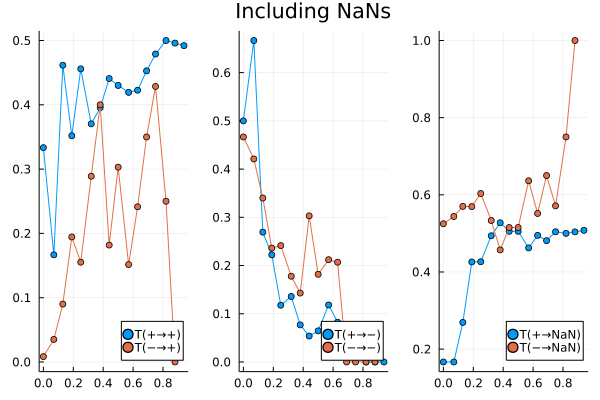

In [16]:
points = 16

chosen_ths = [0:points-1...] ./ points
inds = [findfirst(ths .>= chosen_ths[i]) for i in 1:length(chosen_ths)]

p1 = plot(ths[inds], bal_to_bals3[inds], markershape = :circle, label = "T(+→+)", legend = :bottomright)
plot!(ths[inds], ubal_to_bals3[inds], markershape = :circle, label = "T(−→+)") 
p2 = plot(ths[inds], bal_to_ubals3[inds], markershape = :circle, label = "T(+→−)", legend = :bottomright)
plot!(ths[inds], ubal_to_ubals3[inds], markershape = :circle, label = "T(−→−)") 

p3 = plot(ths[inds], bal_to_nots3[inds], markershape = :circle, label = "T(+→NaN)", legend = :bottomright)
plot!(ths[inds], ubal_to_nots3[inds], markershape = :circle, label = "T(−→NaN)") 

# plot!(p1, legend = :outertopright)
# plot!(p1, legend = :outerbottom)
# plot!(p2, legend = false)
# plot!(p3, legend = false)
title!(p2, "Including NaNs")
plot(p1, p2, p3, layout = (1,3))



In [17]:
ubal_to_ubals3[inds] + ubal_to_bals3[inds]

16-element Vector{Float64}:
   0.47500000000000003
   0.45614035087719296
   0.43000000000000005
   0.4305555555555556
   0.39655172413793105
   0.4666666666666667
   0.5428571428571429
   0.48484848484848486
   0.48484848484848486
   0.36363636363636365
   0.4482758620689655
   0.35
   0.42857142857142855
   0.25
   0.0
 NaN

## Let us calculate transition probability for triad $\Delta_1$

In [18]:
th = 0.5
res = get_triad_transitions(all_triads, th, ord_attributes; all_triads_list = [] )

res[2]

5×5 Matrix{Float64}:
 24.0   4.0   2.0  0.0   23.0
  4.0   6.0   5.0  0.0   17.0
  2.0   2.0  12.0  0.0   24.0
  0.0   0.0   1.0  0.0    0.0
 12.0  11.0   7.0  1.0  173.0

Above we can see the transition of triads $\Delta_1$. 6 triads were kept the same, 26 changed. 

To calibrate $p_n$ one should check which link vanished from the vanished $\Delta_1$ triads. But first let's neglect that. 

In [19]:
ths = [0:15...] / 16
pns = []

for th in ths
    res = get_triad_transitions(all_triads, th, ord_attributes; all_triads_list = [] )
    
    pn = res[2][2,1] / sum(res[2][2,[1,3]])
    
    push!(pns, pn)
end
pns

16-element Vector{Any}:
 NaN
 NaN
   1.0
   1.0
   1.0
   0.4444444444444444
   0.6
   0.6
   0.4444444444444444
   0.8
   1.0
   1.0
   1.0
   1.0
 NaN
 NaN

In [20]:
sum(pns[3:14])/12

0.8240740740740741

In [21]:
th = 0.5
triads_balanced_hist, triads_type_hist = get_triads_history(th, ord_attributes, all_triads)

triads_type_hist[1:3,:]

3×6 Matrix{Any}:
 1  4  4  4  4  4
 0  4  4  4  4  4
 2  4  4  4  4  4

In [22]:
aT = OrderedAttributes(8, th, 3)
T = size(triads_type_hist, 1)
all_triads_list = unique([triad for triads in all_triads for triad in triads])

all_signs = [Symmetric(sign.(get_attribute_layer_weights(aT, ord_attributes[i]))) .* 1. for i in 1:6]
map(x-> x[x .== 0.] .= 1, all_signs)


6-element Vector{SubArray{Float64, 1, Vector{Float64}, Tuple{Vector{Int64}}, false}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [23]:
pos2not = 0
neg2not = 0
cnt = 0
for sem in 1:5
    for (ind, triad) in enumerate(all_triads_list)
        if triads_type_hist[ind, sem] == 1
            if triads_type_hist[ind, sem + 1] == 4 #it vanished
                if any(isnan.(ord_attributes[sem+1][collect(triad),:]))
                    continue
                else
                    i,j,k = triad
                    links = [[i,j], [i,k], [j,k]]

                    vanished = [As[sem+1][link...] == 0 for link in links]

                    # display(triad)
                    # display(links)
                    # display([As[sem+1][link...] for link in links])
                    # display(vanished)
                    
                    #we're intersted only in triads that becaome wedges
                    if sum(vanished) > 1
                        continue
                    end

                    l_ind = findfirst(vanished)

                    sign_changes = [all_signs[sem+1][link...] != all_signs[sem][link...] for link in links]
                    sign_changes[l_ind] = 0

                    # we're interested only in triads that one edge vanished. 
                    if sum(sign_changes) > 0 
                        continue
                    end

                    if all_signs[sem][links[l_ind]...] == 1
                        pos2not += 1
                    else
                        neg2not += 1
                    end

                    # cnt += 1
                    # display((ind, sem))
                end
            end
        end
    end
end

pos2not, neg2not

(3, 0)

In [24]:
ths = [0:15...] / 16
pns = []

for th in ths
    res = get_triad_transitions(all_triads, th, ord_attributes; all_triads_list = [] )
    pos2not, neg2not = calc_delta1_vanishing_triad_fate(all_triads, th, ord_attributes; all_triads_list = [] )
    
    pn = (res[2][2,1] + neg2not) / (sum(res[2][2,[1,3]]) + pos2not + neg2not)

    # display((pos2not, neg2not))
    
    push!(pns, pn)
end
pns

16-element Vector{Any}:
 NaN
 NaN
   1.0
   1.0
   0.6
   0.5
   0.5454545454545454
   0.5
   0.3333333333333333
   0.7142857142857143
   1.0
   1.0
   1.0
   1.0
 NaN
 NaN

In [25]:
sum(pns[3:14])/12

0.766089466089466

### Let us sum all the transitions, no matter threshold. 

Does it have sense?

In [26]:
ths = [0:15...] / 16
pns = []
nums = []
dens = []

for th in ths
    res = get_triad_transitions(all_triads, th, ord_attributes; all_triads_list = [] )
    pos2not, neg2not = calc_delta1_vanishing_triad_fate(all_triads, th, ord_attributes; all_triads_list = [] )
    
    push!(nums, res[2][2,1] + neg2not)
    push!(dens, sum(res[2][2,[1,3]]) + pos2not + neg2not)
    
end
nums, dens

(Any[0.0, 0.0, 1.0, 1.0, 3.0, 5.0, 6.0, 3.0, 4.0, 5.0, 8.0, 8.0, 3.0, 1.0, 0.0, 0.0], Any[0.0, 0.0, 1.0, 1.0, 5.0, 10.0, 11.0, 6.0, 12.0, 7.0, 8.0, 8.0, 3.0, 1.0, 0.0, 0.0])

In [27]:
sum(nums) / (sum(nums) + sum(dens))

0.39669421487603307

Is pn=0.4 a good estimate?